# NOTES

In [2]:
using Plots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots

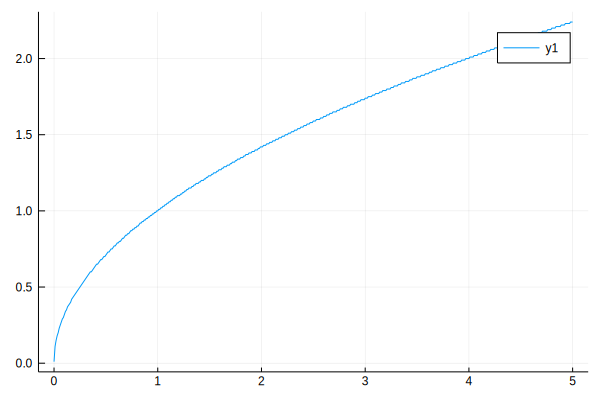

In [2]:
function inv_dist(F, x, d)
    Δ = 0
    while true
        if x < F(Δ)
            return Δ
        end
        Δ += d
    end
end

f(x) = x^2

xs = 0:0.01:5
plot(xs, inv_dist.(f, xs, 0.01))

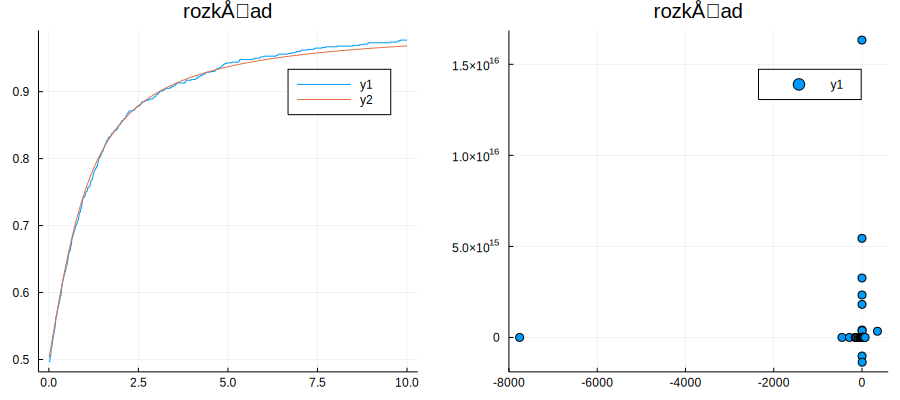

In [3]:
μ = 0
σ = 1

U = rand(Uniform(-π/2, π/2), 1000)
#X = quantile.(Cauchy(0, 1), U)
X = σ .* tan.(U) .+ μ
xs = 0.01:0.01:10
F = ecdf(X)

plot(xs, F.(xs))
plt1 = plot!(xs, cdf.(Cauchy(μ, σ), xs))

#plt2 = histogram(X, normed=true, bins=30)
#plt2 = plot!(xs, pdf.(Cauchy(μ, σ), xs), linewidth=2.5, color="red")
plt2 = scatter(sort(X), quantile.(Cauchy(0, 1), xs))

plot(plt1, plt2, layout=(1, 2), size=(900, 400), title="rozkład")

# MySpace

In [1]:
using Plots

using Distributions
using LinearAlgebra

## Akceptacji-Odrzucenia

In [2]:
n=1e7

1.0e7

In [3]:
f(x)=0<= x <= pi/2 ? sin(x)*2^cos(x)*log(2) : nothing

f (generic function with 1 method)

In [4]:
g(x)= 0<= x <= pi/2 ? 2/pi : nothing

g (generic function with 1 method)

In [5]:
h(x, c)= g(x)/c/f(x)

h (generic function with 1 method)

In [6]:
h(x)=sin(x)*2^cos(x)*2*pi/5

h (generic function with 2 methods)

In [7]:
k()=begin
U=rand()
Y=pi/2*rand()
    while h(Y,5/4)>U
        #println(h(Y,1.25),"   ",Y)
        U=rand()
        Y=pi/2*rand()
    end
    return Y
end

k (generic function with 1 method)

In [8]:
k2()=begin
U=rand()
Y=pi/2*rand()
    while f(Y)/g(Y)/(5/4)>U
        #println(h(Y,1.25),"   ",Y)
        U=rand()
        Y=pi/2*rand()
    end
    return Y
end

k2 (generic function with 1 method)

In [736]:
Z(c=5/4)=begin
    while true
        y=pi/2*rand()
        u=rand()
        
        u<f(y)/c/g(y) ? (return y) : 0
        #u<sin(y)*2^cos(y)*log(2)*pi/8*3 ? (return y) : 0
    end
end

Z (generic function with 2 methods)

In [737]:
n=1e6

1.0e6

In [738]:
maximum(f(x) for x in 0:0.00001:π/2)*π/2

1.3337012428040649

In [739]:
a=[Z(1/log(2)) for i in 1:n];

In [740]:
a=[Z(4/3) for i in 1:n];

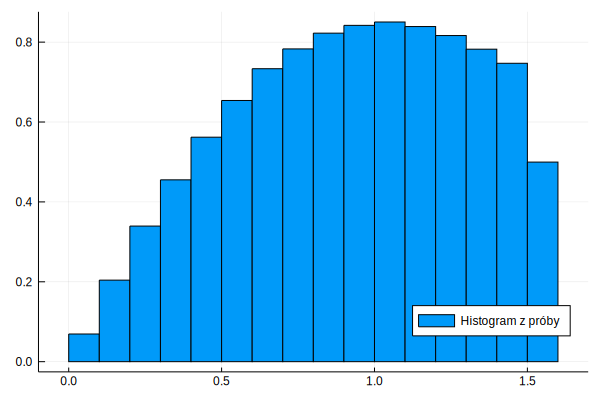

In [741]:
histogram(a,normed=true,  bins=18, label="Histogram z próby", leg=:bottomright)

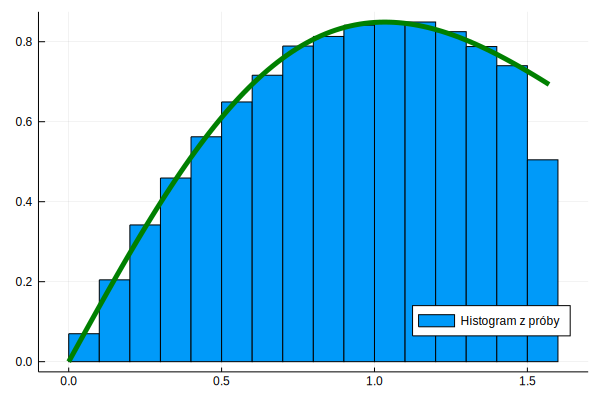

In [713]:
plot!(x->f(x), LinRange(0,pi/2,100), linewidth=5, color=:green, label="")

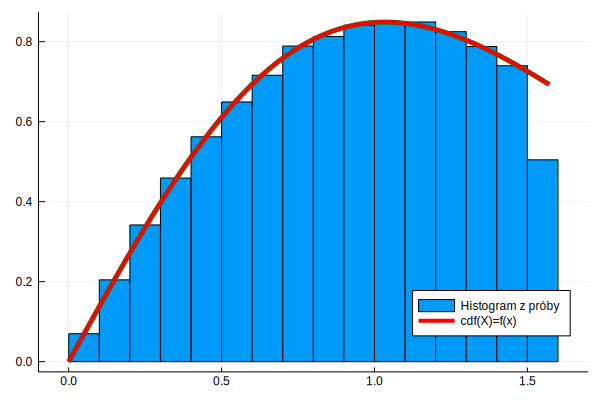

In [714]:
plot!(x->f(x), LinRange(0,pi/2,100), linewidth=4, color=:red, label="cdf(X)=f(x)")

In [97]:
plt1=plot!(dpi=500);

In [98]:
l(x)=sum(a.<x)/n

l (generic function with 1 method)

In [99]:
l(0.2)

0.031

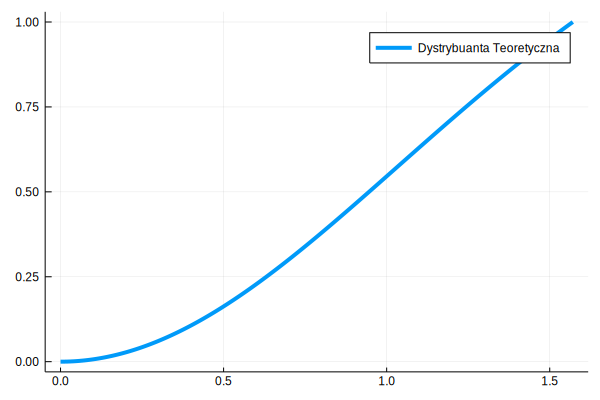

In [100]:
plot(x->(2-2^cos(x)), LinRange(0,pi/2, 1000), label="Dystrybuanta Teoretyczna",linewidth=4)#, color=:red)

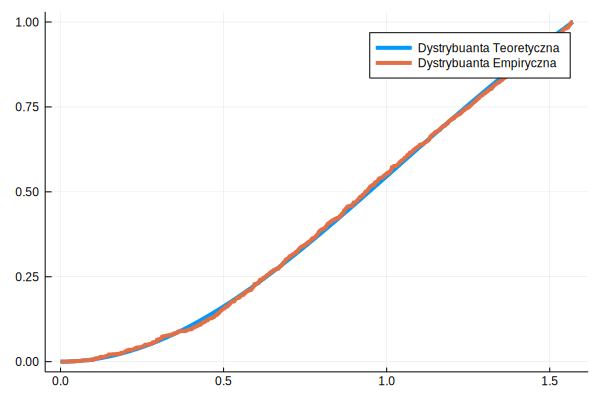

In [101]:
plot!(x->l(x), LinRange(0,pi/2,Int(1e3)), label="Dystrybuanta Empiryczna", linewidth=4)#, color=:black)

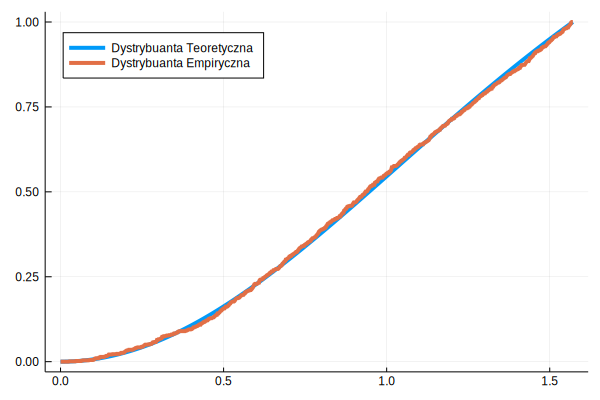

In [102]:
plot!(leg=:topleft)

In [103]:
plt2=plot!(dpi=500);

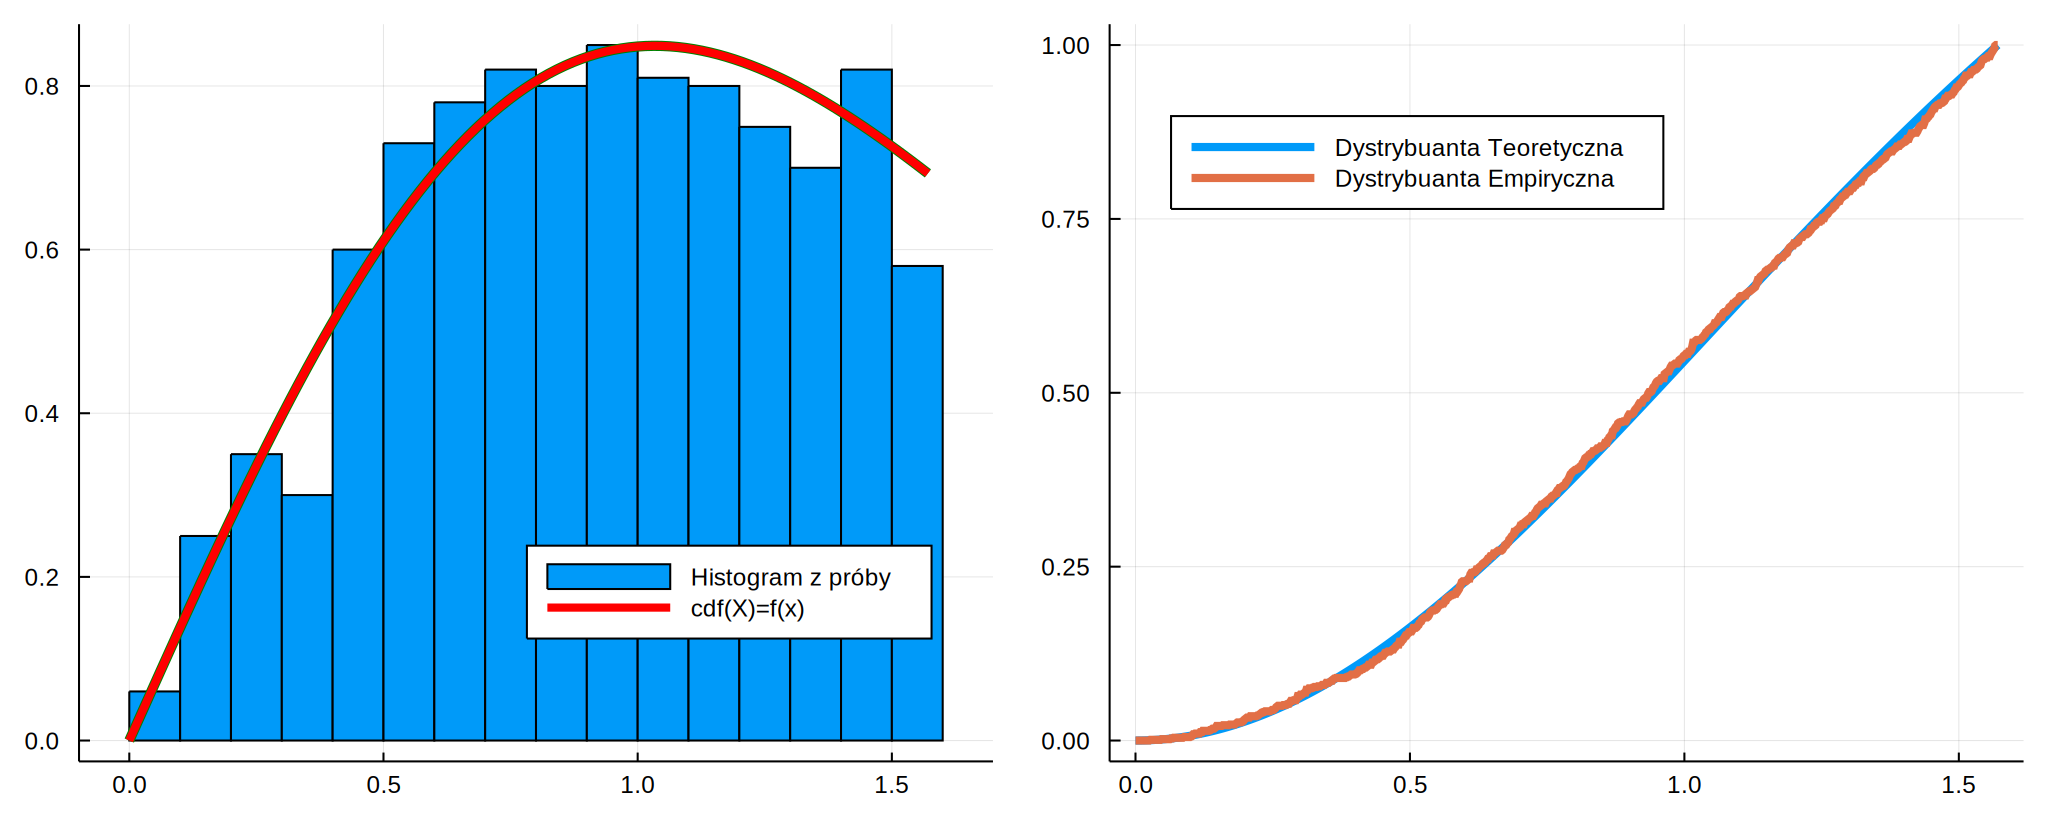

In [104]:
plot(plt1,plt2, layout=(1,2),size=(1000,400))

In [105]:
savefig(plot!(dpi=500),"fig/fig_AO_con.png")

In [106]:
savefig(plt1,"fig/fig_AO_con_hist.png")

In [107]:
savefig(plt2,"fig/fig_AO_con_cdf.png")

In [281]:
#savefig(plot!(dpi=500),"fig/fig_AO_con.png")

In [665]:
dysk(x)=x==-2 ? 0.1 : x==-1 ? 0.2 : x==0 ? 0.5 : x==1 ? 0.2 : 0

dysk (generic function with 1 method)

In [669]:
Y()=begin
    while true
        y=floor(4*rand())-2
        u=rand()
        u<2*dysk(y) ? (return y) : 0
    end
end

Y (generic function with 1 method)

In [697]:
a=[Y() for i in 1:1e2];

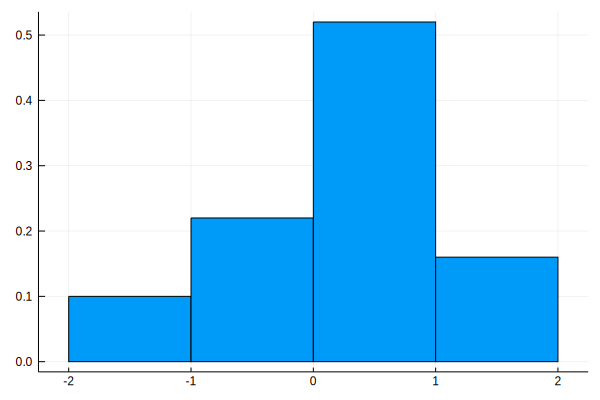

In [699]:
histogram(a, normed=true, bins=4, leg=false)

In [700]:
savefig(plot!(dpi=500),"fig/fig_AO_dysk.png")

# Rozkład normaly

## Boxa-Mulera

In [2]:
N(n)=begin
    U,u=rand(n),rand(n)
    append!(sqrt.(-2*log.(U)).*cos.(2*pi*u),sqrt.(-2*log.(U)).*sin.(2*pi*u))
end

N (generic function with 1 method)

In [188]:
n=1e3

1000.0

In [200]:
a=N(Int(n/2));

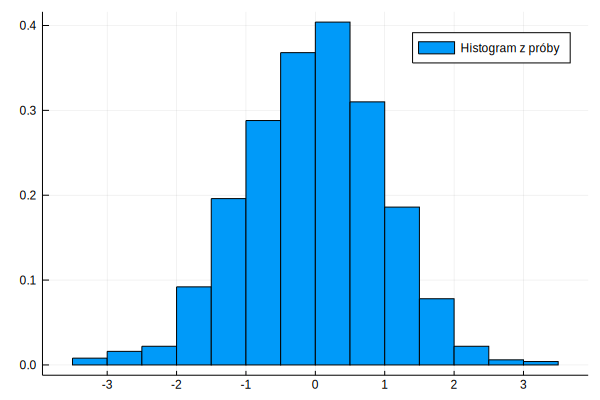

In [216]:
histogram(a,normed=true, label="Histogram z próby")

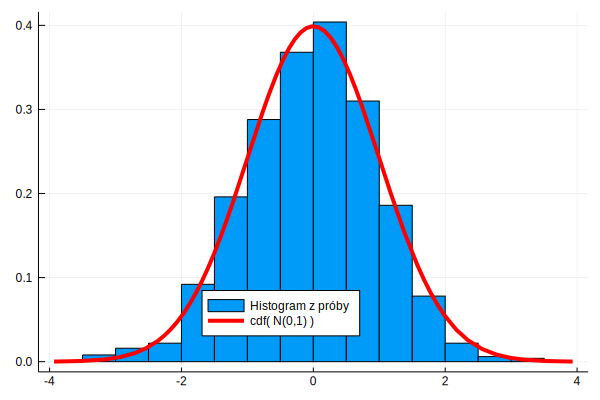

In [217]:
plot!(x->exp(-x^2/2)/sqrt(2pi), label="cdf( N(0,1) )", linewidth=4, color=:red, leg=:bottom)

In [218]:
plt1=plot!(dpi=500);

In [219]:
l(x)=sum(a.<x)/n

l (generic function with 1 method)

In [220]:
l(0)

0.495

In [221]:
X=Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

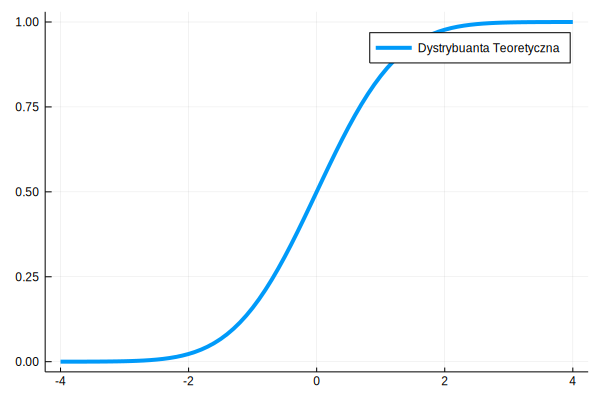

In [222]:
plot(x->cdf(X,x), -4:0.1:4, label="Dystrybuanta Teoretyczna", linewidth=4)

In [188]:
n=1e3

1000.0

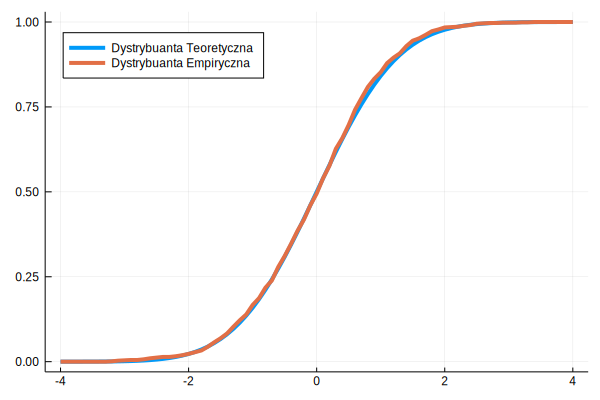

In [223]:
plot!(x->l(x),-4:0.1:4, leg=:topleft, label="Dystrybuanta Empiryczna", linewidth=4)

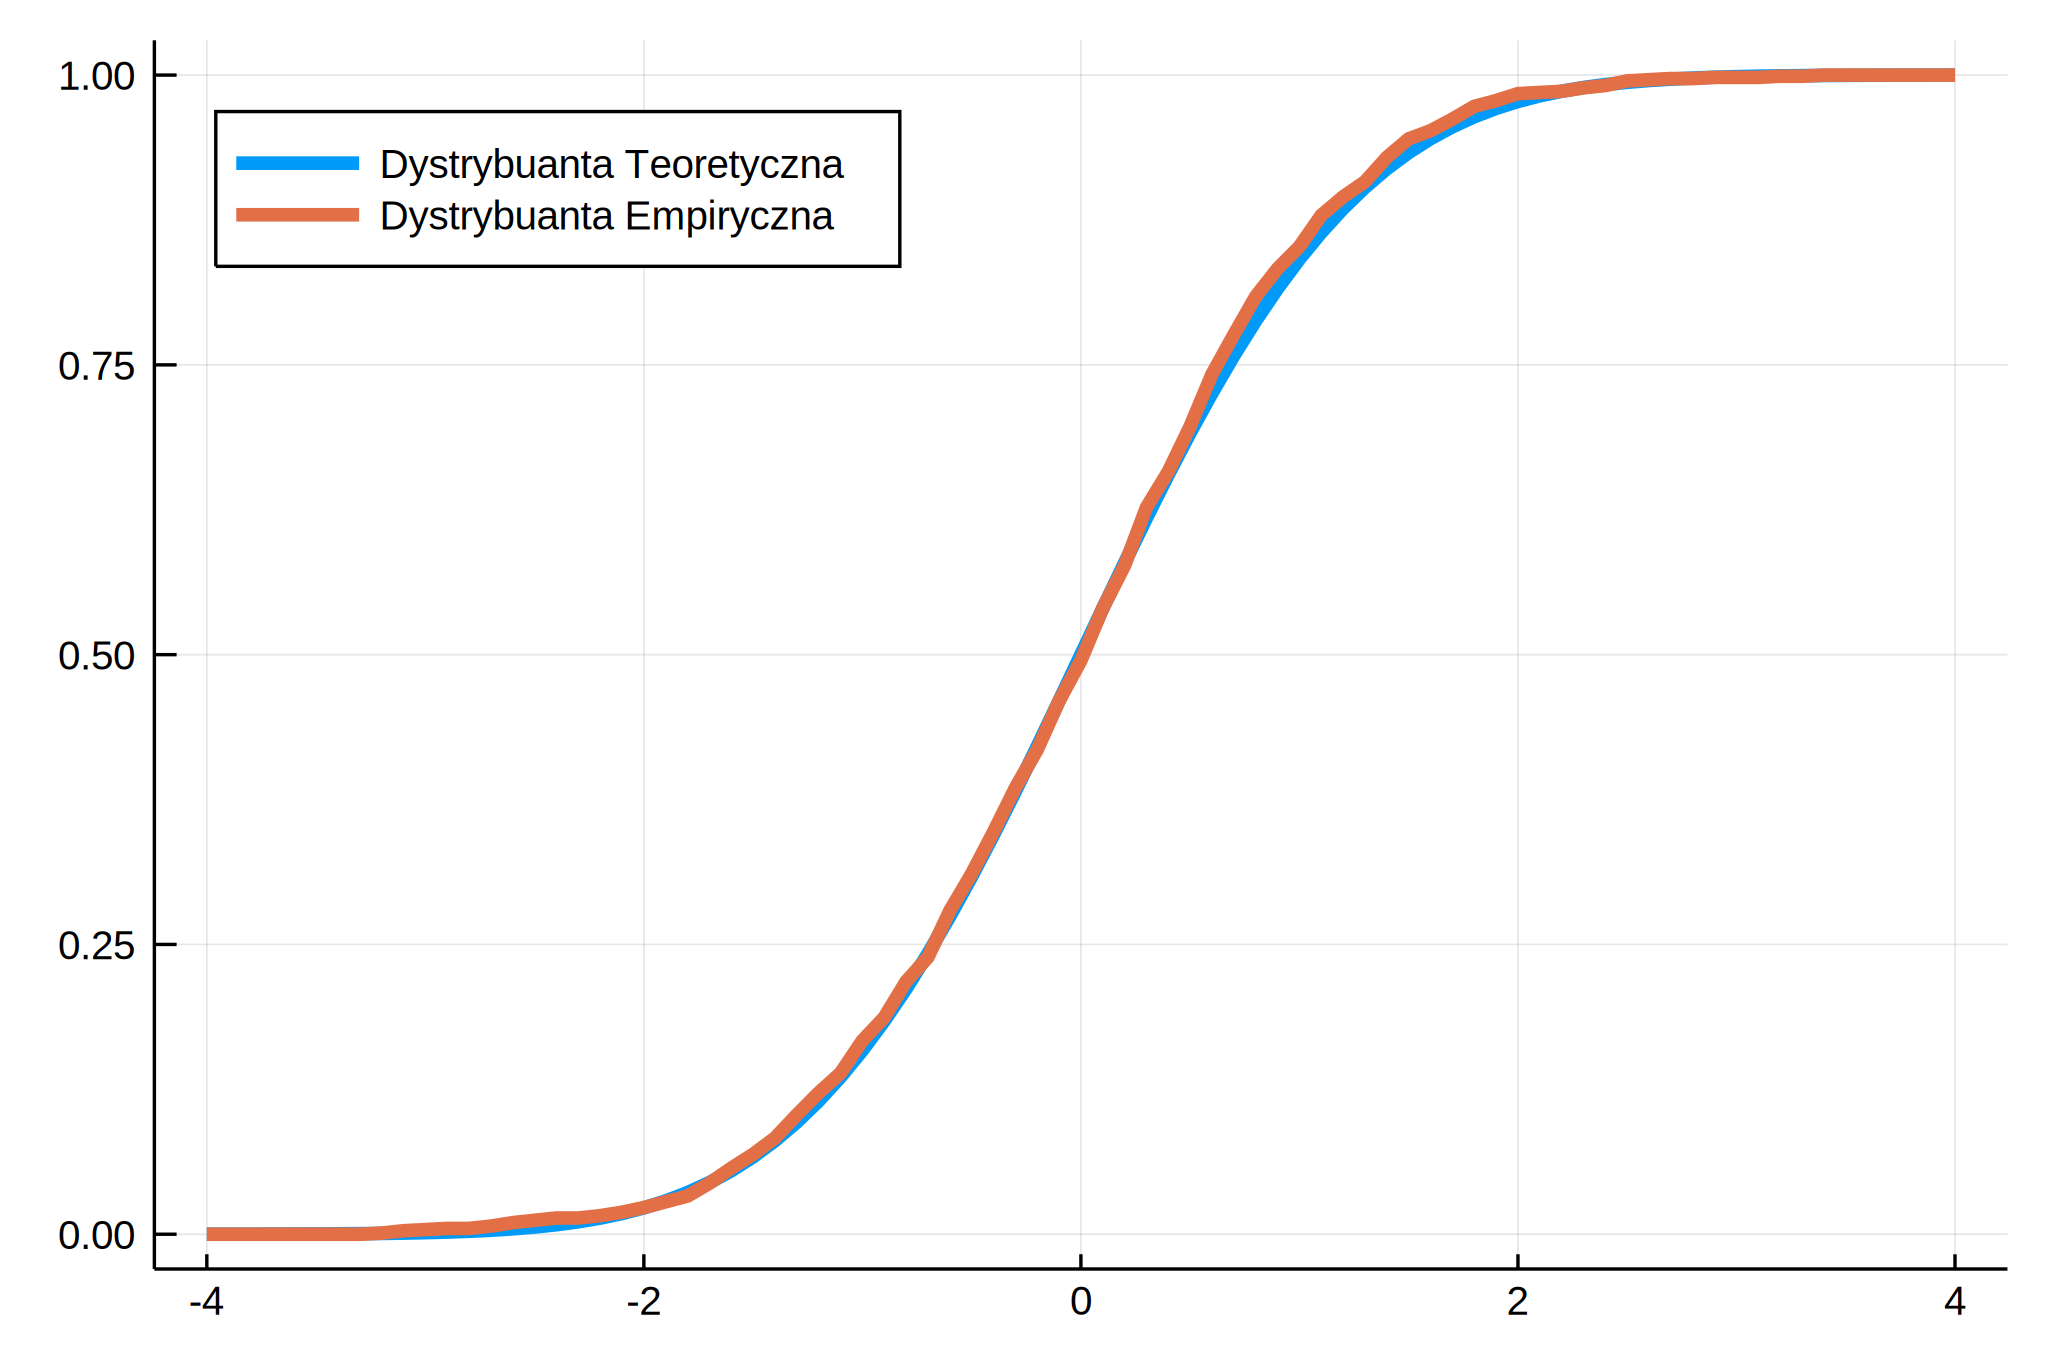

In [224]:
plt2=plot!(dpi=500)

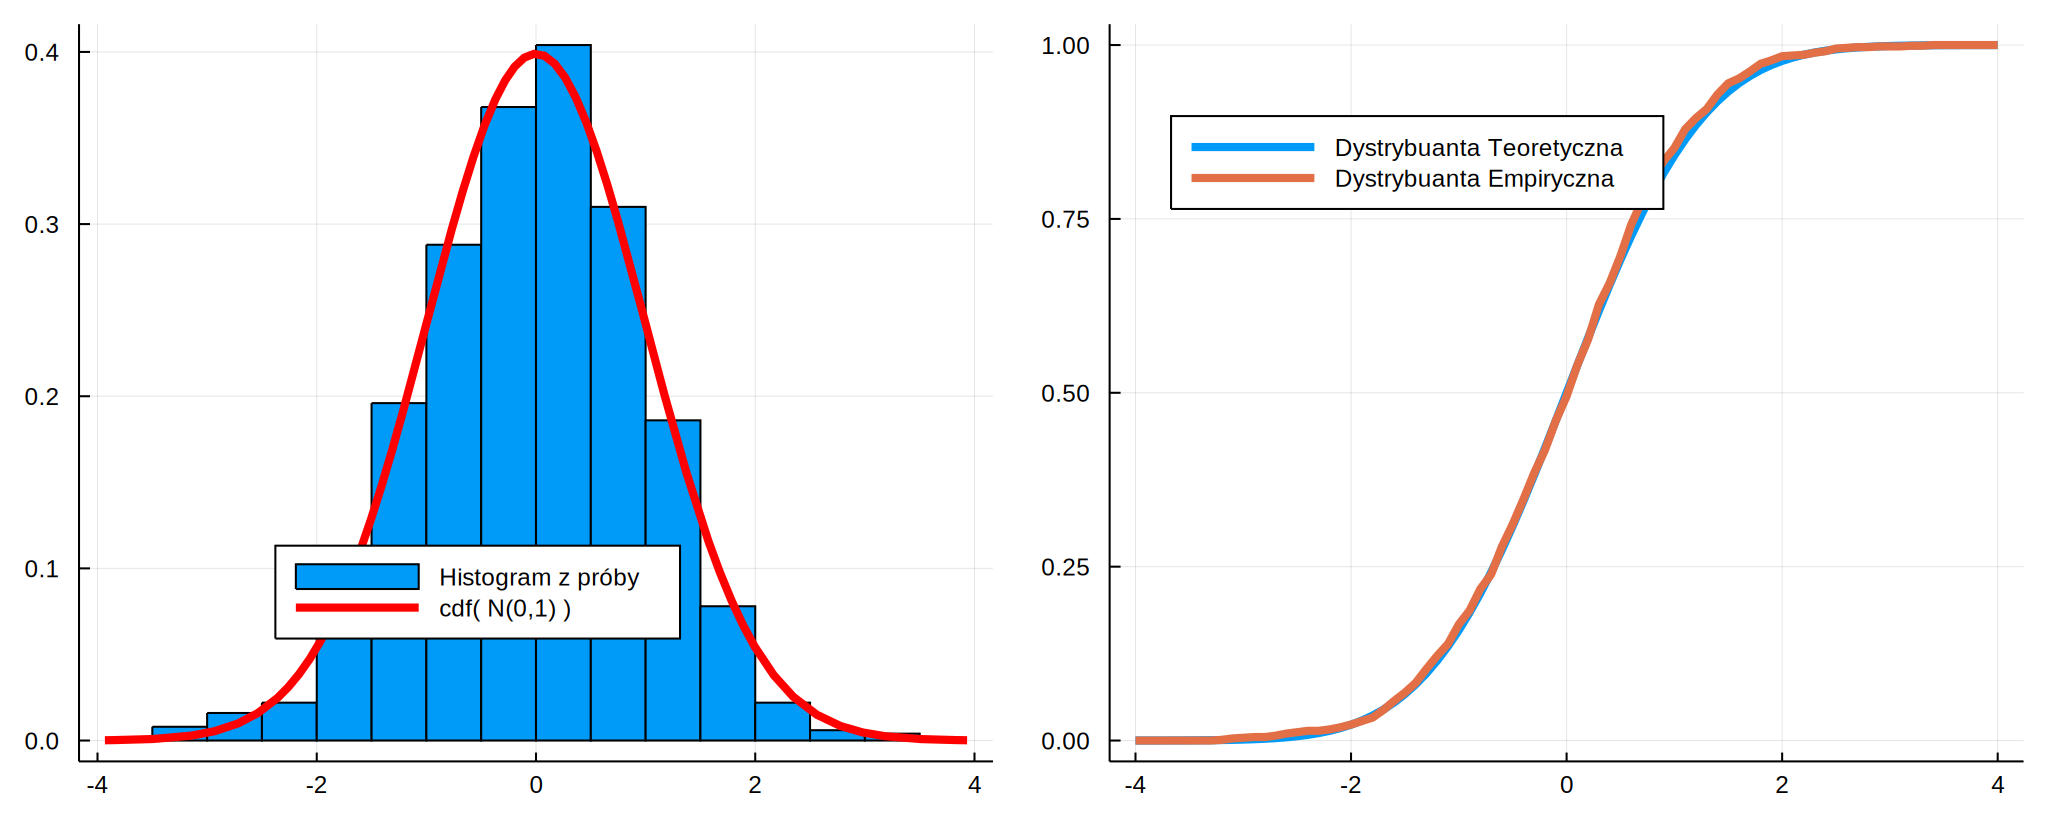

In [225]:
plot(plt1,plt2, layout=(1,2),size=(1000,400))

In [226]:
savefig(plot!(dpi=500),"fig/fig_BM.png")

## Biegunowa

In [3]:
Nb(n)=begin
    U,u,R=zeros(n), zeros(n), zeros(n).+2
    for i in 1:n
        while R[i]>1
            a,b=2*rand()-1,2*rand()-1
            R[i]=a^2+b^2
            u[i]=b
            U[i]=a
        end
    end
    X=zeros(2n)
    s=sqrt.(-2*log.(R)./R)
    X[1:n],X[n+1:end] = s.*U, s.*u
    X
end
            

Nb (generic function with 1 method)

In [278]:
a=N(Int(n/2));

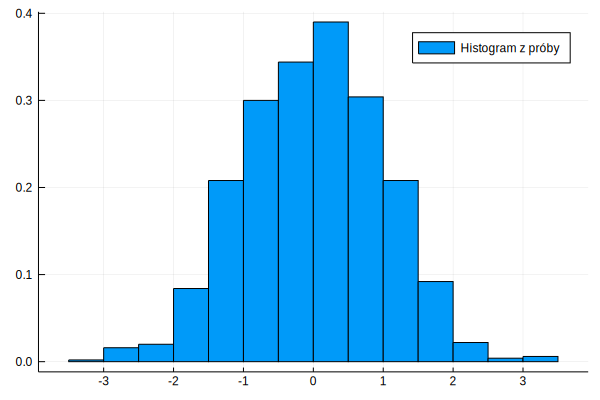

In [279]:
histogram(a,normed=true, label="Histogram z próby")

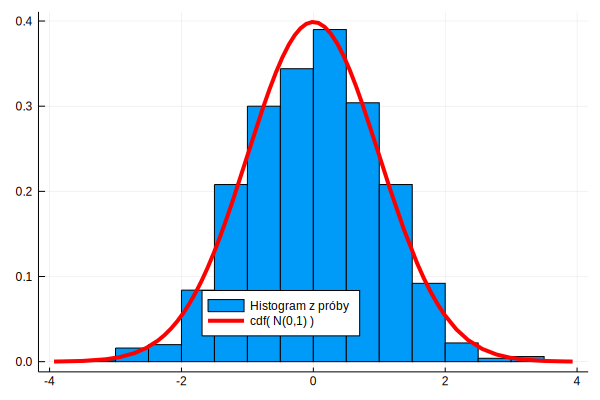

In [280]:
plot!(x->exp(-x^2/2)/sqrt(2pi), label="cdf( N(0,1) )", linewidth=4, color=:red, leg=:bottom)

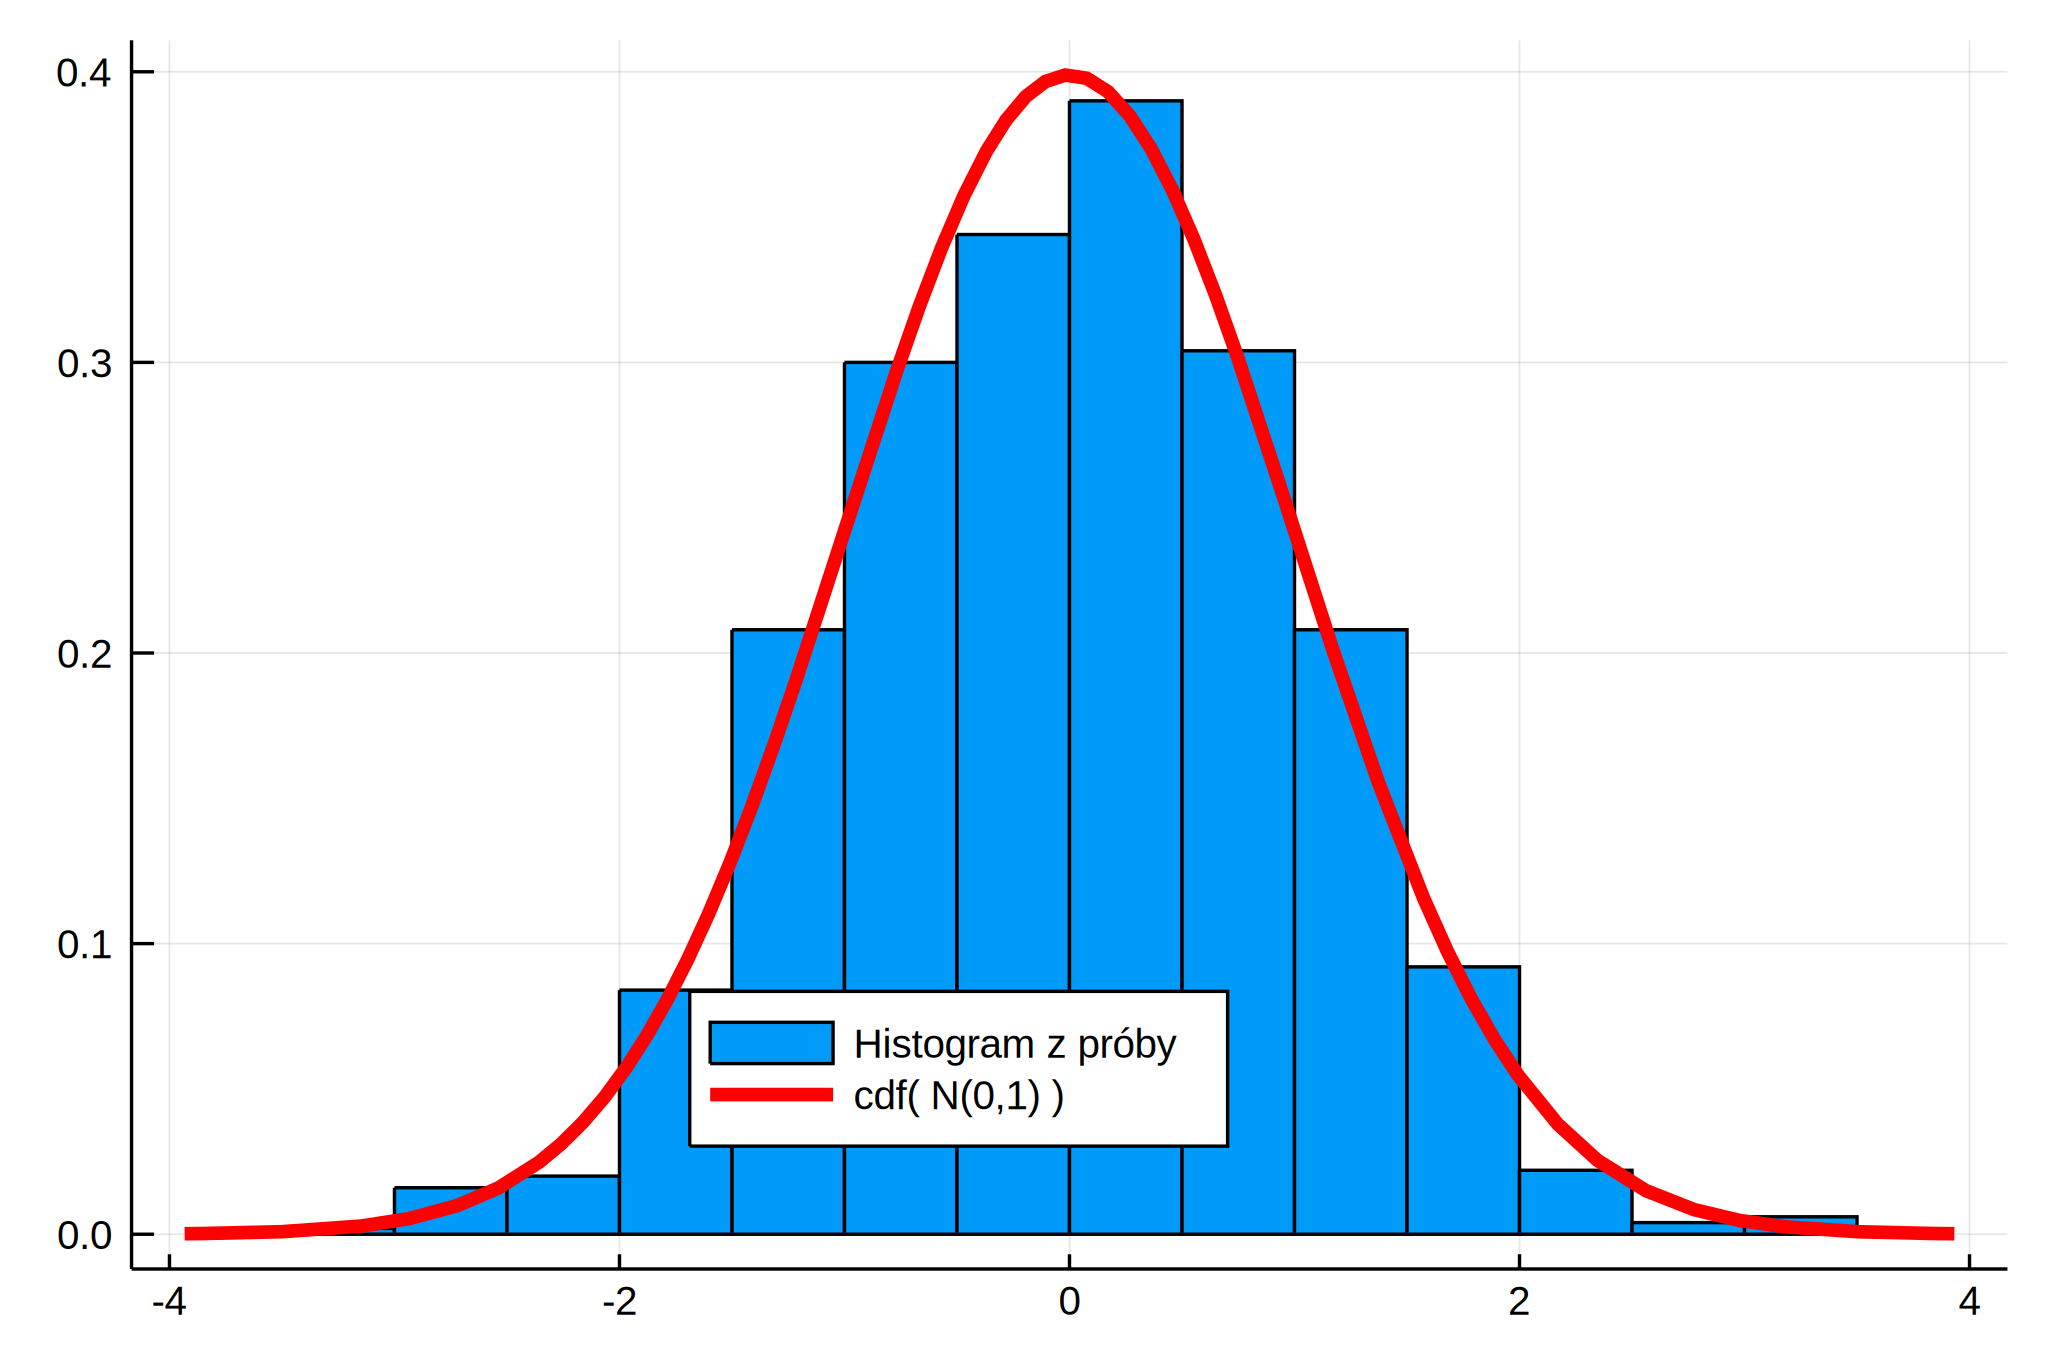

In [281]:
plt1=plot!(dpi=500)

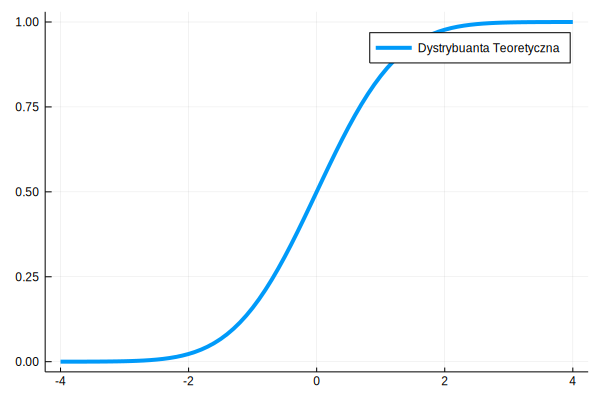

In [282]:
plot(x->cdf(X,x), -4:0.1:4, label="Dystrybuanta Teoretyczna", linewidth=4)

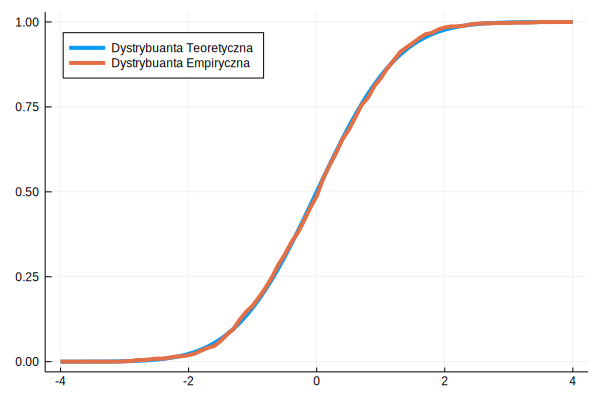

In [283]:
plot!(x->l(x),-4:0.1:4, leg=:topleft, label="Dystrybuanta Empiryczna", linewidth=4)

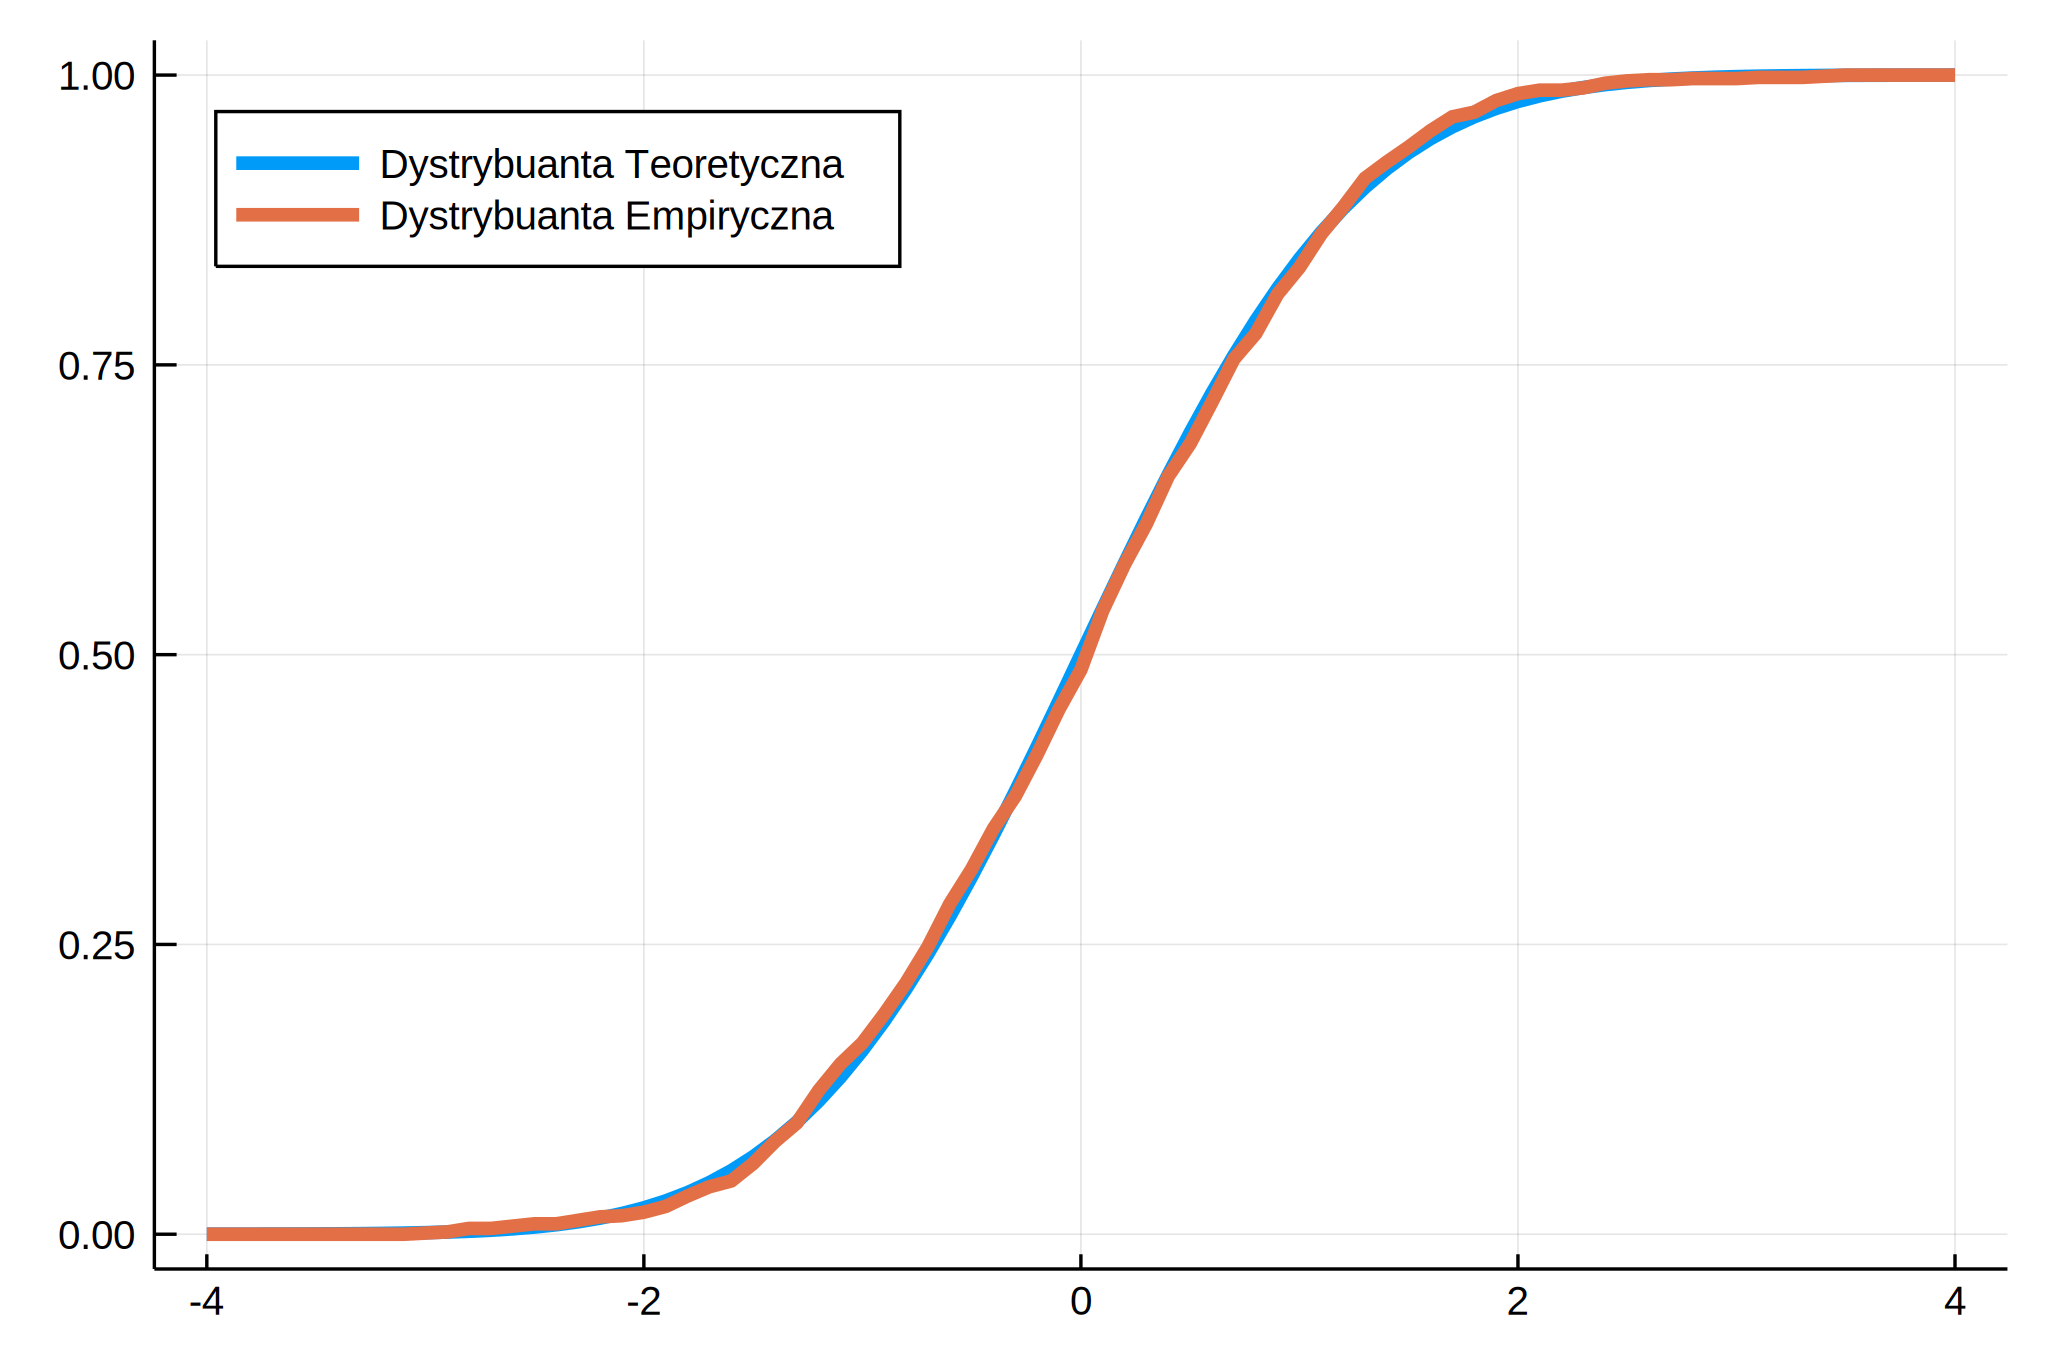

In [284]:
plt2=plot!(dpi=500)

In [285]:
plot(plt1,plt2, layout=(1,2),size=(1000,400));

In [286]:
savefig(plot!(dpi=500),"fig/fig_pol.png")

# Porównanie metod

## cos

In [1]:
Nb2(n)=begin
    U,u=2*rand(Int(floor(1.3n))).-1, 2*rand(Int(floor(1.3n))).-1
    R=U.^2 .+u.^2
    
    temp=R.<1
    N=Int(n/2)
    U,u,R=U[temp][1:N],u[temp][1:N],R[temp][1:N]
    temp=sqrt.(-2*log.(R)./R)
    X=zeros(n)
    X[1:N],X[N+1:end] = temp.*U, temp.*u
    X
end
            


Nb2 (generic function with 1 method)

In [377]:
time()

1.651183264274e9

In [378]:
n=1e6

1.0e6

In [4]:
tim(n,fun)=begin
    n=Int(floor(n/2))
    t=time()
    fun(n)
    time()-t
end

tim (generic function with 1 method)

In [380]:
n=1e9

1.0e9

In [381]:
t_n=tim(n,N)

LoadError: UndefVarError: Bigfloatime not defined

In [382]:
t_b=tim(n,Nb)

LoadError: UndefVarError: Bigfloatime not defined

In [383]:
Nb2(1000);

In [384]:
tim(1000,Nb2)

LoadError: UndefVarError: Bigfloatime not defined

In [385]:
tim(1000000,Nb)

LoadError: UndefVarError: Bigfloatime not defined

In [386]:
tim(1000000,Nb2)

LoadError: UndefVarError: Bigfloatime not defined

In [387]:
t_b2=tim(n,Nb2)

LoadError: UndefVarError: Bigfloatime not defined

In [388]:
tab=zeros(100)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [391]:
for i in 10:27
    tab[i]=tim(2^i,N)/tim(2^i,Nb)
end

LoadError: UndefVarError: Bigfloatime not defined

In [396]:
tab[tab.>0]

Float64[]

In [375]:
mean(ans)

Inf

In [529]:
Nb2(n)=begin
    n=Int(n/2)
    U,u=2*rand(Int(floor(1.3n))).-1, 2*rand(Int(floor(1.3n))).-1
    R=U.^2 .+u.^2
    
    temp=R.<1
    U,u,R=U[temp],u[temp],R[temp]
    U,u,R=U[1:n],u[1:n],R[1:n]
    temp=sqrt.(-2*log.(R)./R)
    X=zeros(2*n)
    
    X[1:n],X[n+1:end] = temp.*U, temp.*u
    X
end
            


Nb2 (generic function with 1 method)

In [538]:
tim(1e7,Nb2)

0.2610001564025879

In [539]:
tim(1e7, Nb)

0.317000150680542

In [546]:
for i in 18:27
    tab[i]=tim(2^i,Nb2)/tim(2^i,Nb)
end

In [547]:
tab[18:27]

10-element Vector{Float64}:
 0.333346578717317
 2.0
 0.5416687362784737
 0.5777803680136482
 0.5494536013058025
 0.8943671076292288
 0.5758862490002485
 0.9535298947932704
 0.808241657905003
 0.7014333399039622

In [548]:
t_b2_8=tim(1e8,Nb2)

1.9869999885559082

In [549]:
t_b2=tim(1e9, Nb2)

101.98300004005432

In [552]:
t_n

280.0899999141693

In [531]:
Nb2(1e7)

10000000-element Vector{Float64}:
 -1.6114605200240617
  0.835745693990962
 -1.1738415442696177
 -0.7028805589513251
  2.389396225575617
 -0.40051988870065774
  0.2938828855965566
  0.20534915706427712
  0.01023308225499442
 -0.6727532214903457
 -0.495143602933583
 -0.1986335072939279
 -0.27041203456521806
  ⋮
  0.5627492425425934
 -0.11087953334758464
 -0.6813855609667497
 -0.05812289266740945
 -0.8362323429728117
 -1.2052238750142328
  0.47518264526863624
  0.26345975101615754
 -0.7216363183686781
 -1.3443650164804346
 -0.2534161418960093
  0.31641522715290993

In [ ]:
for i in 1:10
    println(tim(1e7,Nb2))
end

In [445]:
m=Int(6)

6

In [449]:
i=0
while length(Nb2(m))==m
    i+=1
    println(i)
end

31
52
33
64
65
66
67
38
49
410
511
612
313
614
415
316
517
418
419
520
521
622
523
424
625
526
627
528
629
530
531
532
633
334
635
636
437
638
439
440
441
442
443
344
545
646
447
548
549
550
451
552
553
554
455
456
557
458
659
660
361
662
663
364
365
666
467
568
569
470
371
572
673
574
475
476
577
478
579
480
481
582
583
584
485
586
587
688
589
690
591
492
493
594
495
396
397
498
599
6100
5101
6102
6103
5104
5105
6106
4107
3108
4109
5110
5111
6112
4113
5114
5115
5116
4117
6118
5119
5120
5121
3122
3123
5124
6125
5126
4127
5128
6129
5130
5131
5132
6133
5134
3135
3136
6137
5138
5139
5140
5141
5142
6143
5144
6145
5146
3147
5148
3149
5150
6151
5152
5153
6154
3155
5156
4157
3158
5159
6160
6161
5162
3163
5164
6165
4166
4167
6168
6169
4170
6171
4172
5173
5174
4175
5176
6177
6178
4179
6180
4181
2

LoadError: BoundsError: attempt to access 2-element Vector{Float64} at index [1:3]

In [454]:
for i in 1:10
    println(tim(1e7,Nb2))
end

3927842
0.24699997901916504
3926257
0.37800002098083496
3926990
0.25300002098083496
3926308
0.3580000400543213
3926753
0.2780001163482666
3927017
0.3969998359680176
3926880
0.2760000228881836
3928839
0.40200018882751465
3927466
0.2519998550415039
3926393
0.36100006103515625


In [556]:
T=zeros(30,2)

30×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 ⋮    
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [ ]:
for i in 10:30
    T[i,1]=tim(2^i,N)
    T[i,2]=tim(2^i,Nb2)
end

In [572]:
T[13:end,:]

18×2 Matrix{Float64}:
   0.00300002    0.00199986
   0.00500011    0.00399995
   0.00900006    0.00899982
   0.0190001     0.013
   0.03          0.0190001
   0.0190001     0.00300002
   0.013         0.013
   0.0279999     0.0150001
   0.056         0.0279999
   0.113         0.0519998
   0.371         0.226
   0.741         0.522
   1.18          1.199
   2.121         1.571
   3.996         2.863
   7.643         4.244
  38.264         9.015
 308.305       125.324

In [580]:
T[13:end,1]./T[13:end,2]

18-element Vector{Float64}:
 1.5001192179303768
 1.2500447040591285
 1.0000264914697468
 1.461541283057624
 1.5789414244842643
 6.333306842565366
 1.0
 1.8666454740522929
 2.000008514986376
 2.1730879446866846
 1.641592635611074
 1.4195399070167674
 0.9841536139607117
 1.350095633024148
 1.3957386782617647
 1.8008953730054214
 4.244481363693958
 2.460063518222156

In [578]:
maximum(ans)

6.333306842565366

In [581]:
minimum(ans)

0.9841536139607117

In [587]:
a=T[13:end,1];
b=T[13:end,2];
I=[13+i for i in 0:length(a)-1];
c=b./a


18-element Vector{Float64}:
 0.6666136851307319
 0.799971390425329
 0.9999735092320327
 0.6842092054409477
 0.6333357175213981
 0.15789539727952617
 1.0
 0.5357203678474114
 0.4999978712624691
 0.46017465719464
 0.6091645261479596
 0.7044536015204736
 1.0161015372138043
 0.7406882709190379
 0.7164664958954834
 0.5552793432586546
 0.23560004493215714
 0.406493569207791

In [610]:
a=round.(a,digits=3)
b=round.(b,digits=3)
c=round.(c,digits=3);


In [627]:
wyn=""
for i in 1:9
    wyn*="\$2^{$(I[i])}\$ & $(a[i]) & $(b[i]) & $(c[i])  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{$(I[i+9])}\$ & $(a[i+9]) & $(b[i+9]) & $(c[i+9])\\\\\\cline{1-4}\\cline{6-9}\n"
end

In [628]:
wyn

"\$2^{13}\$ & 0.003 & 0.002 & 0.667  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{22}\$ & 0.113 & 0.052 & 0.46\\\\\\cline{1-4}\\cline{6-9}\n\$2^{14}\$ & 0.005 & 0.004 & 0.8  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{23}\$ & 0.371 & 0.226 & 0.609\\\\\\cline{1-4}\\cline{6-9}\n\$2^{15}\$ & 0.009 & 0.009 & 1.0  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{24}\$ & 0.741 & 0.522 & 0.704\\\\\\cline{1-4}\\cline{6-9}\n\$2^{16}\$ & 0.019 & 0.013 & 0.684  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{25}\$ & 1.18 & 1.199 & 1.016\\\\\\cline{1-4}\\cline{6-9}\n\$2^{17}\$ & 0.03 & 0.019 & 0.633  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{26}\$ & 2.121 & 1.571 & 0.741\\\\\\cline{1-4}\\cline{6-9}\n\$2^{18}\$ & 0.019 & 0.003 & 0.158  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{27}\$ & 3.996 & 2.863 & 0.716\\\\\\cline{1-4}\\cline{6-9}\n\$2^{19}\$ & 0.013 & 0.013 & 1.0  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{28}\$ & 7.643 & 4.244 & 0.555\\\\\\cline{1-4}\\cline{6-9}\n\$2^{20}\$ & 0.028 & 0.015 & 0.536  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{29}

In [629]:
round(0.233, digits=2)

0.23

In [630]:
print(wyn)

$2^{13}$ & 0.003 & 0.002 & 0.667  &$\vphantom{\dfrac{1}{1}}$&  $2^{22}$ & 0.113 & 0.052 & 0.46\\\cline{1-4}\cline{6-9}
$2^{14}$ & 0.005 & 0.004 & 0.8  &$\vphantom{\dfrac{1}{1}}$&  $2^{23}$ & 0.371 & 0.226 & 0.609\\\cline{1-4}\cline{6-9}
$2^{15}$ & 0.009 & 0.009 & 1.0  &$\vphantom{\dfrac{1}{1}}$&  $2^{24}$ & 0.741 & 0.522 & 0.704\\\cline{1-4}\cline{6-9}
$2^{16}$ & 0.019 & 0.013 & 0.684  &$\vphantom{\dfrac{1}{1}}$&  $2^{25}$ & 1.18 & 1.199 & 1.016\\\cline{1-4}\cline{6-9}
$2^{17}$ & 0.03 & 0.019 & 0.633  &$\vphantom{\dfrac{1}{1}}$&  $2^{26}$ & 2.121 & 1.571 & 0.741\\\cline{1-4}\cline{6-9}
$2^{18}$ & 0.019 & 0.003 & 0.158  &$\vphantom{\dfrac{1}{1}}$&  $2^{27}$ & 3.996 & 2.863 & 0.716\\\cline{1-4}\cline{6-9}
$2^{19}$ & 0.013 & 0.013 & 1.0  &$\vphantom{\dfrac{1}{1}}$&  $2^{28}$ & 7.643 & 4.244 & 0.555\\\cline{1-4}\cline{6-9}
$2^{20}$ & 0.028 & 0.015 & 0.536  &$\vphantom{\dfrac{1}{1}}$&  $2^{29}$ & 38.264 & 9.015 & 0.236\\\cline{1-4}\cline{6-9}
$2^{21}$ & 0.056 & 0.028 & 0.5  &$\vphantom{\dfr

In [632]:
tim(2^28,N)

7.41100001335144

In [640]:
2^30*1e0

1.073741824e9

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots C:\Users\Kacper\.julia\packages\Plots\qZHsp\src\args.jl:1194


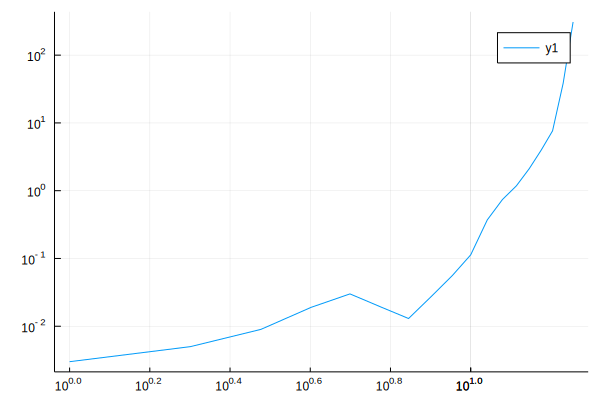

In [634]:
plot(a, scale=:log)

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots C:\Users\Kacper\.julia\packages\Plots\qZHsp\src\args.jl:1194


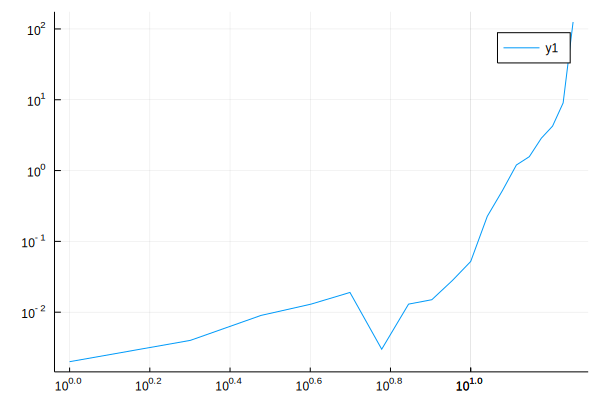

In [635]:
plot(b, scale=:log)

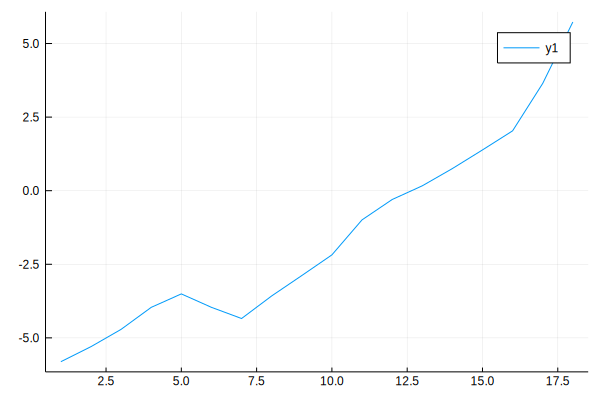

In [636]:
plot(log.(a))

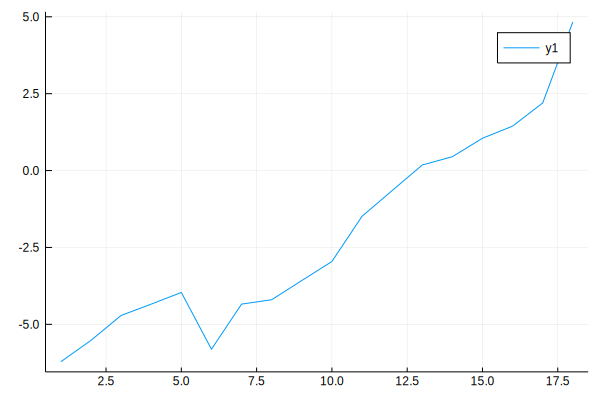

In [637]:
plot(log.(b))

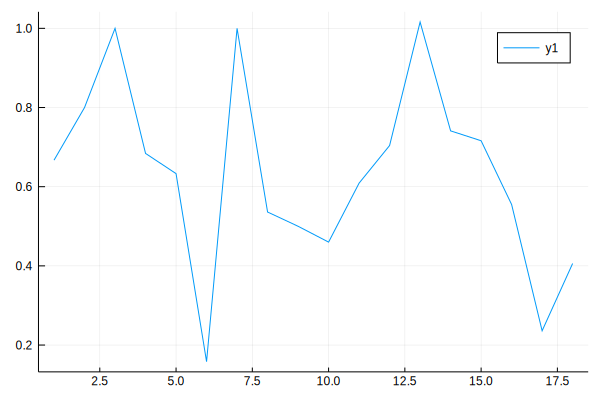

In [638]:
plot(c)

## na poważnie

In [10]:
tim(1e9,Nb2)

661.9809999465942

In [11]:
2^30*1e0

1.073741824e9

In [37]:
tim(1e8,Nb2)

2.299999952316284

In [38]:
Tb=zeros(12,1000);
Tn=zeros(12,1000);

In [39]:
for n in 19:24
    for i in 1:1000
        Tb[n-18,i]=tim(2^n,Nb2)
        Tn[n-18,i]=tim(2^n,N)
    end
end

In [40]:
for n in 25:27
    for i in 1:200
        Tb[n-18,i]=tim(2^n,Nb2)
        Tn[n-18,i]=tim(2^n,N)
    end
end

In [41]:
for n in 28:30
    for i in 1:10
        Tb[n-18,i]=tim(2^n,Nb2)
        Tn[n-18,i]=tim(2^n,N)
    end
end

LoadError: OutOfMemoryError()

In [43]:
Tb

12×1000 Matrix{Float64}:
   0.0079999   0.0079999   0.00800014  …  0.00700021  0.0079999  0.0079999
   0.0150001   0.0159998   0.0159998      0.05        0.0149999  0.016
   0.0309999   0.0310001   0.03           0.0310001   0.0309999  0.063
   0.0599999   0.092       0.0610001      0.099       0.0619998  0.0969999
   0.148       0.158       0.157          0.159       0.16       0.162
   0.298       0.283       0.269       …  0.366       0.379      0.362
   0.659       0.685       0.661          0.0         0.0        0.0
   1.41        1.527       1.297          0.0         0.0        0.0
   2.695       2.854       2.844          0.0         0.0        0.0
   5.271       5.503       5.56           0.0         0.0        0.0
  57.195      13.989      13.04        …  0.0         0.0        0.0
 723.892       0.0         0.0            0.0         0.0        0.0

In [44]:
Tn

12×1000 Matrix{Float64}:
  0.0480001   0.0139999   0.0139999  …  0.0139999  0.0150001  0.0139999
  0.0280001   0.0270002   0.0280001     0.0280001  0.0280001  0.027
  0.056       0.086       0.056         0.0550001  0.0550001  0.056
  0.111       0.11        0.11          0.11       0.109      0.11
  0.22        0.221       0.221         0.219      0.218      0.219
  0.474       0.44        0.472      …  0.442      0.445      0.443
  0.977       1.025       0.965         0.0        0.0        0.0
  1.875       1.902       1.923         0.0        0.0        0.0
  3.987       3.97        4.009         0.0        0.0        0.0
  7.804       7.773       7.754         0.0        0.0        0.0
 35.347      42.399      26.668      …  0.0        0.0        0.0
  0.0         0.0         0.0           0.0        0.0        0.0

In [52]:
a=Tb[11,:]
b=a[a.>0]

10-element Vector{Float64}:
 57.1949999332428
 13.988999843597412
 13.039999961853027
 13.263999938964844
 13.297000169754028
 12.47100019454956
 12.032999992370605
 11.776000022888184
 11.60099983215332
 12.90499997138977

In [54]:
using Distributions

In [55]:
mean()

17.157099986076354

In [56]:
tab_b(n)=begin
    a=Tb[n,:]
    a[a.>0]
end
tab_n(n)=begin
    a=Tn[n,:]
    a[a.>0]
end

tab_n (generic function with 1 method)

In [80]:
Save_T_b=Tb
Save_T_n=Tn;

In [62]:
mean(tab_b(10))

5.499800014495849

In [65]:
mean_b=[mean(tab_b(i)) for i in 1:12]
mean_n=[mean(tab_n(i)) for i in 1:12];

In [67]:
using Plots

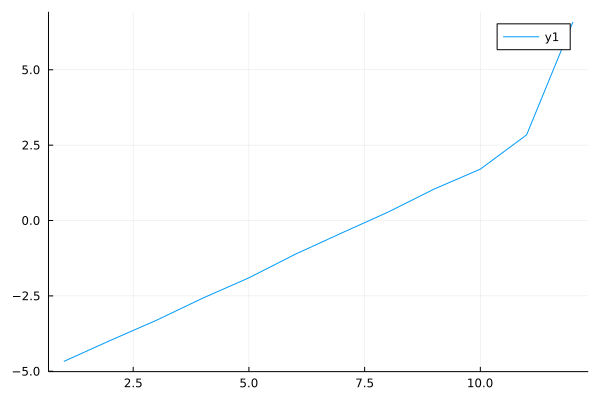

In [73]:
plot(log.(mean_b))

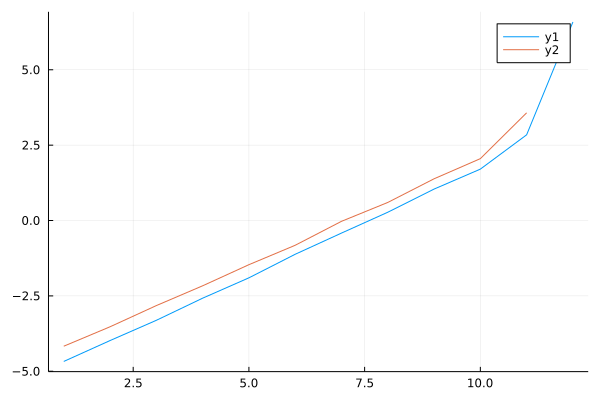

In [74]:
plot!(log.(mean_n))

In [77]:
T_12=zeros(10,2)

10×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [76]:
T_12[1,:]

2-element Vector{Float64}:
 0.0
 0.0

In [83]:
#t_12=zerose()
for i in 2:10
    T_12[i,1]=tim(2^30,Nb2)
    #T_12[i,2]=tim(2^30,N)
end


LoadError: OutOfMemoryError()

In [87]:
T_12

10×2 Matrix{Float64}:
 644.928  0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0

In [88]:
for i in 2:10
    T_12[i,1]=tim(2^30,Nb2)
    #T_12[i,2]=tim(2^30,N)
end


LoadError: OutOfMemoryError()

In [89]:
T_12

10×2 Matrix{Float64}:
 644.928  0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0
   0.0    0.0

In [90]:
T_12[2,1]=tim(2^30,Nb2)


LoadError: OutOfMemoryError()

In [98]:
mean_b

12-element Vector{Float64}:
   0.009333997964859009
   0.018661008596420288
   0.036519002437591555
   0.07607099080085754
   0.14945399951934815
   0.32647100257873535
   0.6593150055408478
   1.31594499707222
   2.8364849984645844
   5.499800014495849
  17.157099986076354
 684.4100000858307

In [95]:
T_12[1]

644.9279999732971

In [103]:
T_temp=zeros(10,2);
T_temp[1,:]

2-element Vector{Float64}:
 0.0
 0.0

In [113]:
for n in 11:18
    temp_1=0
    temp_2=0
    for i in 1:1000
        temp_1+=tim(2^n,Nb2)
        temp_2+=tim(2^n,N)
    end
    T_temp[n-10,1]=temp_1/1e3
    T_temp[n-10,2]=temp_2/1e3
end

In [114]:
T_temp

10×2 Matrix{Float64}:
 7.60007e-5   7.09991e-5
 9.40001e-5   0.000133
 0.000189     0.000285
 0.000295     0.000529001
 0.000559001  0.000943999
 0.000919     0.001627
 0.001612     0.003385
 0.004848     0.007636
 0.0          0.0
 0.0          0.0

In [115]:
mean_n

12-element Vector{Float64}:
   0.015469001770019532
   0.029471991777420044
   0.059514997482299804
   0.11470500946044922
   0.23112800073623657
   0.4401479978561401
   0.9737349951267242
   1.8211100018024444
   3.989690001010895
   7.785799980163574
  35.5936999797821
 NaN

In [127]:
Mean=zeros(20,2);

In [128]:
Mean[1:10,:]=T_temp

10×2 Matrix{Float64}:
 7.60007e-5   7.09991e-5
 9.40001e-5   0.000133
 0.000189     0.000285
 0.000295     0.000529001
 0.000559001  0.000943999
 0.000919     0.001627
 0.001612     0.003385
 0.004848     0.007636
 0.0          0.0
 0.0          0.0

In [132]:
Mean[9:end,1]=mean_b

12-element Vector{Float64}:
   0.009333997964859009
   0.018661008596420288
   0.036519002437591555
   0.07607099080085754
   0.14945399951934815
   0.32647100257873535
   0.6593150055408478
   1.31594499707222
   2.8364849984645844
   5.499800014495849
  17.157099986076354
 684.4100000858307

In [133]:
Mean[9:end,2]=mean_n

12-element Vector{Float64}:
   0.015469001770019532
   0.029471991777420044
   0.059514997482299804
   0.11470500946044922
   0.23112800073623657
   0.4401479978561401
   0.9737349951267242
   1.8211100018024444
   3.989690001010895
   7.785799980163574
  35.5936999797821
 NaN

In [134]:
Mean

20×2 Matrix{Float64}:
   7.60007e-5     7.09991e-5
   9.40001e-5     0.000133
   0.000189       0.000285
   0.000295       0.000529001
   0.000559001    0.000943999
   0.000919       0.001627
   0.001612       0.003385
   0.004848       0.007636
   0.009334       0.015469
   0.018661       0.029472
   0.036519       0.059515
   0.076071       0.114705
   0.149454       0.231128
   0.326471       0.440148
   0.659315       0.973735
   1.31594        1.82111
   2.83648        3.98969
   5.4998         7.7858
  17.1571        35.5937
 684.41         NaN

In [163]:
using LaTeXStrings

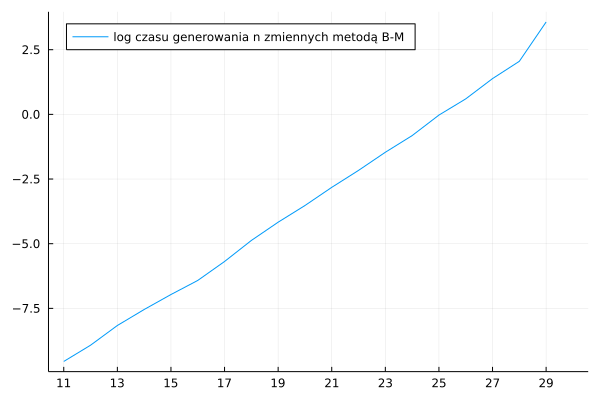

In [231]:
plot(11:30,log.(Mean[:,2]),xticks=11:2:30,leg=:topleft,label="log czasu generowania n zmiennych metodą B-M")#, xlabel=L"liczba przypadków $n=2^x$")

In [232]:
plt1=plot!(dpi=500);

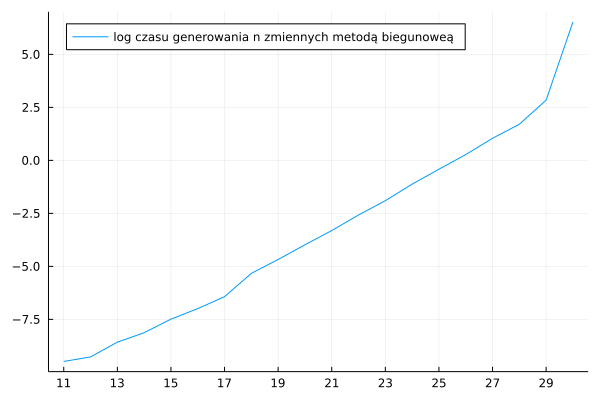

In [233]:
plot(11:30,log.(Mean[:,1]),xticks=11:2:30,leg=:topleft,label="log czasu generowania n zmiennych metodą biegunoweą")#, xlabel=L"liczba przypadków $n=2^x$")

In [234]:
plt2=plot!(dpi=500);

In [235]:
plot(plt1,plt2, layout=(1,2),size=(1000,400));
savefig(plot!(dpi=500),"fig/fig_normal_time.png")

In [207]:
I=11:30

11:30

In [208]:
a=Mean[:,1];
b=Mean[:,2];
c=a./b;

In [212]:
a[1:10]=round.(a[1:10], digits=6)
b[1:10]=round.(b[1:10], digits=6)
c[1:10]=round.(c[1:10], digits=6);

In [213]:
a[11:end]=round.(a[11:end], digits=3)
b[11:end]=round.(b[11:end], digits=3)
c[11:end]=round.(c[11:end], digits=3);

In [214]:
wyn=""
for i in 1:10
    wyn*="\$2^{$(I[i])}\$ & $(a[i]) & $(b[i]) & $(c[i])  &\$\\vphantom{\\dfrac{1}{1}}\$&  \$2^{$(I[i+9])}\$ & $(a[i+9]) & $(b[i+9]) & $(c[i+9])\\\\\\cline{1-4}\\cline{6-9}\n"
end

In [215]:
print(wyn)

$2^{11}$ & 7.6e-5 & 7.1e-5 & 1.070445  &$\vphantom{\dfrac{1}{1}}$&  $2^{20}$ & 0.018661 & 0.029472 & 0.633178\\\cline{1-4}\cline{6-9}
$2^{12}$ & 9.4e-5 & 0.000133 & 0.706768  &$\vphantom{\dfrac{1}{1}}$&  $2^{21}$ & 0.037 & 0.06 & 0.614\\\cline{1-4}\cline{6-9}
$2^{13}$ & 0.000189 & 0.000285 & 0.663159  &$\vphantom{\dfrac{1}{1}}$&  $2^{22}$ & 0.076 & 0.115 & 0.663\\\cline{1-4}\cline{6-9}
$2^{14}$ & 0.000295 & 0.000529 & 0.557655  &$\vphantom{\dfrac{1}{1}}$&  $2^{23}$ & 0.149 & 0.231 & 0.647\\\cline{1-4}\cline{6-9}
$2^{15}$ & 0.000559 & 0.000944 & 0.592163  &$\vphantom{\dfrac{1}{1}}$&  $2^{24}$ & 0.326 & 0.44 & 0.742\\\cline{1-4}\cline{6-9}
$2^{16}$ & 0.000919 & 0.001627 & 0.564843  &$\vphantom{\dfrac{1}{1}}$&  $2^{25}$ & 0.659 & 0.974 & 0.677\\\cline{1-4}\cline{6-9}
$2^{17}$ & 0.001612 & 0.003385 & 0.476219  &$\vphantom{\dfrac{1}{1}}$&  $2^{26}$ & 1.316 & 1.821 & 0.723\\\cline{1-4}\cline{6-9}
$2^{18}$ & 0.004848 & 0.007636 & 0.634886  &$\vphantom{\dfrac{1}{1}}$&  $2^{27}$ & 2.836 & 3.99 

In [223]:
sum(tim(1e6,N) for i in 1:100)

3.0960001945495605

In [224]:
sum(tim(1e7,N) for i in 1:10)

3.677999973297119

In [222]:
tim(1e8,N)

2.984999895095825